<a href="https://colab.research.google.com/github/jrmaza/physical-chemistry/blob/main/S03E01_QuantumIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Espectro electromagnético de emisión**
La energía electromagnética es transferida en forma de ondas, y abarca un amplio espectro que va desde longitudes de onda muy grandes (ondas de radio), hasta longitudes de onda muy pequeñas (rayos gama). El ojo humano sólo puede detectar una pequeña porción del espectro, denominado luz visible, que va en una longitud de onda de 390nm (7.7e14Hz) a 750nm (3.9e14Hz), recordar que $\nu = \frac{c}{\lambda}$, donde $c$ es la velocidad de la luz.

<img src="http://solar-center.stanford.edu/about/electromagneticspectrum.jpg" alt="Espectro Electromagnético" width="550" height="400"> 


---

### ```ScyPi```: Ciencias Básicas en python
SciPy es una librería científica de python que proporciona funciones de optimización, estadística y procesamiento de señales, entre otros. Para acceder a las constantes físicas fundamentales, invocamos el siguiente código:
```python
from scipy.constants import (constantes)
```
Una lista de las constantes físicas fundamentales puede ser encontrada aquí https://docs.scipy.org/doc/scipy/reference/constants.html

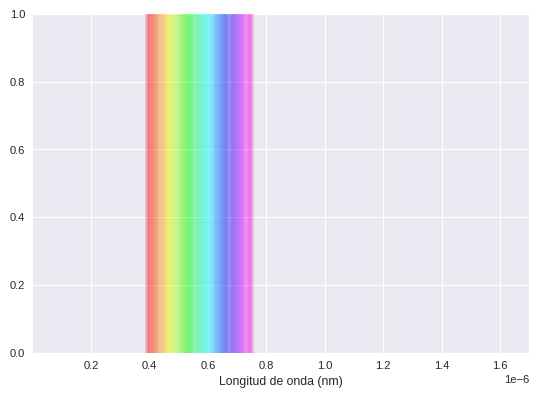

In [208]:
#@title Espectro electromagnético visible
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, h, k

lambda_visible = np.linspace(390e-9,750e-9,100)

plt.style.use('seaborn-paper') # estilo del gráfico 'seaborn-paper', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight',  'seaborn-whitegrid','classic',  '_classic_test', 'fast',  'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep
fig, ax = plt.subplots() #creamos el entorno del gráfico
plt.xlim([1e-9, 1.7e-6]) # límites del eje X (frecuencia)
ax.set_xlabel('Longitud de onda (nm)')
#plt.ticklabel_format(axis='x', style='sci', scilimits=(0.3,0.4))

colormap = plt.cm.gist_rainbow # invocamos el mapa de color estilo rainbow
colors = [colormap(i) for i in np.linspace(0.0, 1.0, 100)] #asignamos in color por índice
j = 0
for valores in lambda_visible:
  axvline(valores, lw = 3, color = colors[j], alpha = 0.15) 
  j += 1


---


## Radiación del Cuerpo Negro
La radiación térmica emitida por un cuerpo es función de la temperatura.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Example_incandescence_colors_%28temperature_range_550_-_1300_C%29.svg/800px-Example_incandescence_colors_%28temperature_range_550_-_1300_C%29.svg.png" width="200" height="600" >

<img src="https://www.e-education.psu.edu/meteo300/sites/www.e-education.psu.edu.meteo300/files/images/lesson6/Solar_spectrum_en.svg.png" alt="Espectro Electromagnético solar" width="550" height="400"> 

En 1879 (Stefan) y 1884 (Boltzman) se determinó que la radiación o energía radiante por unidad de área (poder emisivo) en función de la temperatura absoluta y la emisividad del material:

\begin{align}
E = e\sigma T^4
\end{align}

Donde la constante Stefan–Boltzmann $\sigma = 5.6704×10^{−8} W/m^2\cdot K$

Posteriormente, en 1894 Wien estableció que la radiación monocromática emitida por un cuerpo es función de de la longitud de onda y la temperatura absoluta:

\begin{align}
E_{\lambda} = \frac{a}{\lambda^5}f(\lambda,T)
\end{align}

En 1900, Rayleigh, aplicando el principio de [equipartición](https://es.wikipedia.org/wiki/Teorema_de_equipartici%C3%B3n) al campo electromagnético (asociación con $k_BT$), posteriormente Jeans corregió algunos inconvenientes con la expresión de Rayleigh, conocida como la ecuación de Rayleigh-Jeans para la radiación espectral, $B$:



Recordando:





In [245]:
#@title Radiación Espectral de Rayleigh-Jeans
%%latex
\begin{aligned}
B_{\lambda,T} = \frac{2ck_BT}{\lambda^4}
\end{aligned}

<IPython.core.display.Latex object>

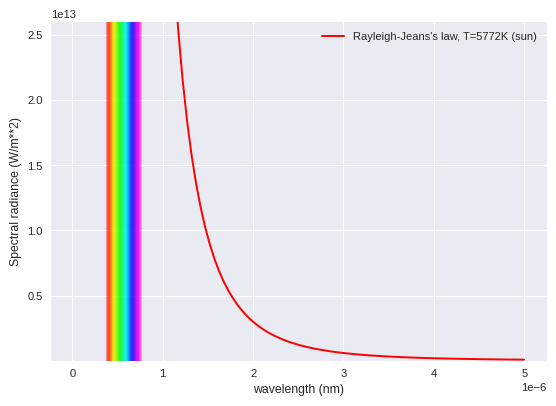

In [256]:
#@title Gráfico de Rayleigh-Jeans

wavelength_nm = np.linspace(10,5000,100)
wavelength_m = wavelength_nm*1e-9

T = 5772 #K

rj = 2*c*k*T/wavelength_m**4

a = (2.0*h*c**2)
b = (h*c)/(wavelength_m*k*T)
planck = a/((wavelength_m**5)*((np.exp(b)-1)))

fig, ax = plt.subplots()
#plt.plot(wavelength_m,planck,'g-')
ax.plot(wavelength_m,rj,'r-',label = 'Rayleigh-Jeans\'s law, T=5772K (sun)')
j = 0
for valores in lambda_visible:
  axvline(valores, lw = 3, color = colors[j], alpha = 0.15) 
  j += 1
plt.xlabel('wavelength (nm)')
plt.ylabel('Spectral radiance (W/m**2)')
plt.ylim(1e8,2.6e13)
plt.legend()
plt.show()

#plt.xlim([1e10, 1e15]) # límites del eje X (frecuencia)
#ax.plot(nu, ry(nu,273), label = 'Rayleigh Jean\'s law, T=273K')
ax.plot(wavelength_m, rj, label = 'Rayleigh Jean\'s law, T=5772K (sun)')
#ax.plot(nu, ry(nu,2000), label = 'Rayleigh Jean\'s law, T=2000K')
#ax.plot(nu, ry(long_onda,5772), label = 'Rayleigh Jean\'s law, T=5772K (Sun)')
ax.legend()


In [249]:
#@title Radiación Espectral de Planck
%%latex
\begin{aligned}
B_{\lambda,T} = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}
\end{aligned}

<IPython.core.display.Latex object>

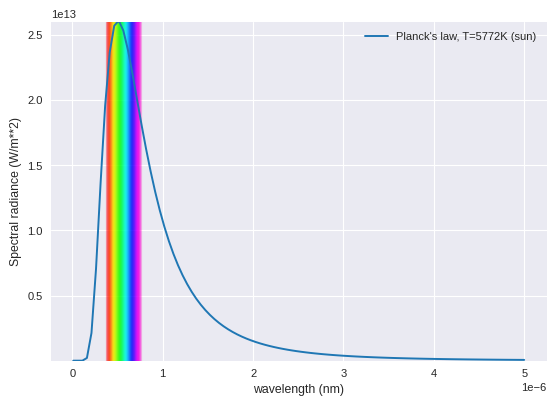

In [260]:
#@title Gráfico de Planck

wavelength_nm = np.linspace(10,5000,100)
wavelength_m = wavelength_nm*1e-9

T = 5772 #K

a = (2.0*h*c**2)
b = (h*c)/(wavelength_m*k*T)
planck = a/((wavelength_m**5)*((np.exp(b)-1)))

fig, ax = plt.subplots()
j = 0
for valores in lambda_visible:
  axvline(valores, lw = 3, color = colors[j], alpha = 0.15) 
  j += 1
plt.plot(wavelength_m,planck,label = 'Planck\'s law, T=5772K (sun)')
#plt.plot(wavelength_m,rj,label = 'Rayleigh-Jeans\'s law, T=5772K (sun)')
plt.xlabel('wavelength (nm)')
plt.ylabel('Spectral radiance (W/m**2)')
plt.ylim(1e8,2.6e13)
plt.legend()
plt.show()

ax.legend()

## Nacimiento de la teoría cuántica

En 1900, [Max Planck](https://grahamfarmelo.com/max-planck-letter-hitler-discovered/) presentó una hipótesis que desafiaba a la física clásica: la energía no puede ser emitida/absorbida de manera continua, sino que de manera discreta, que obedecían a cantidades enteras múltiplos (estados energéticos). La emisión de radiación del cuerpo negro sólo es posible cuando hay un cambio de estos estados determinados. 



In [5]:
#@title Ecuación de Planck
%%latex
\begin{aligned}
E = n\cdot h\nu \\
E_\lambda = \frac{2\pi c^2}{\lambda^e5}\frac{1}{e^{\frac{ch}{\lambda kT}}-1} 
\end{aligned}

<IPython.core.display.Latex object>

## Espectros atómicos
Al mismo tiempo en que se discutía la radiación del cuerpo negro, un desarrollo similar se estaba llevando a cabo en el campo de los espectros de emisión atómicos.

*   Se observó que cuando una descarga eléctrica pasa a través de un elemento en estado gaseoso hay emisión de luz
<img src="https://chem.libretexts.org/@api/deki/files/77924/CK12_Screenshot_5-5-1.png" alt="Espectro Electromagnético solar" width="660" height="150"> 
*   Un análisis de la luz reveló una serie de líneas asociadas a unas longitudes de onda y características para cada elemento
<img src="https://chem.libretexts.org/@api/deki/files/77927/CK12_Screenshot_5-5-2.png" alt="Espectro Electromagnético solar" width="500" height="500"> 

En 1885, [Johann Jakob Balmer](https://en.wikipedia.org/wiki/Johann_Jakob_Balmer) describió que para el átomo de hidrógeno estas líneas de emisión correspondían con una relación matemática:

In [27]:
#@title Fórmula de Balmer
%%latex
\begin{aligned}
\lambda = \frac{bn^2}{n^2 - 4} \\
\hat{\nu} = \frac{1}{\lambda} = R_H (\frac{1}{n_1^2} - \frac{1}{n_2^2}) \text{ siendo $n_1$ < $n_2$}\\
\text{Donde $R_H$ es la constante de Rydberg= $10973758.306m^{-1}$}
\end{aligned}

<IPython.core.display.Latex object>

## Espectro de emisión para el Hidrógeno

<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Visible_spectrum_of_hydrogen.jpg" alt="Espectro Electromagnético solar" width="900" height="100"> 


|Transición de $n_2$ a $n_1$| 	$3\rightarrow2$ |	$4\rightarrow2$ |	$5\rightarrow2$ |	$6\rightarrow2$ |	$7\rightarrow2$ |	$8\rightarrow2$ |	$9\rightarrow2$ |	$ \infty \rightarrow 2$ |
| -------------- | ---- | --- | --- | --- | --- | --- | --- | ----------- |
|Nombre |	$H-\alpha$ |	$H-\beta$ |	$H-γ$ |	$H-σ$ |	$H-ϵ$ |	$H-ζ$ 	| $H-η$ | 	
|Longitud de onda (nm) |	656.3 |	486.1 |	434.1 |	410.2 |	397.0 |	388.9 |	383.5 |	364.6 |
|Color | 	Rojo (red) |	Azul-verde (blue-green) |	Violeta (violet) |	Violeta (violet) |	(Ultravioleta) |	(Ultravioleta) |	(Ultravioleta) 	| (Ultravioleta) |


In [18]:
#@title Transición 3 a 2
%%latex
\begin{aligned}
\frac{1}{\lambda_{n_3 \rightarrow n_2}} = R_H (\frac{1}{2^2} - \frac{1}{3^2})
\end{aligned}

<IPython.core.display.Latex object>

In [ ]:
def balmer(n1,n2):
  ry=10973758.306 #m-1
  wavelenght = (1 / (ry*(1/n1**2 - 1/n2**2)))*1e9
  return wavelenght 
balmer(2,3)

## El modelo atómico de Bohr

* Los electrones de un átomo están restringidos a una órbita en particular (estado energético basal), la radiación se produce cuando el electrón ha migrado de órbita (estado energético exitado). Cuando esto se produce, la emsión es igual a $h\nu = E_1 - E_2$

In [22]:
#@title Radio atómico
%%latex
\begin{aligned}
r = \frac{n^2h^2}{4\pi^2mze^2}
\end{aligned}

<IPython.core.display.Latex object>

In [24]:
#@title Energía del electrón
%%latex
\begin{aligned}
E_n = -\frac{2\pi^2me^4z^2}{n^2h^2} 
\end{aligned}

<IPython.core.display.Latex object>

✅ **Ejercicio** Demostrar que la constante de Rydberg es igual a $\frac{2\pi^2me^4z^2}{ch^3}$ para el átomo de hidrógeno



---

# La ecuación de onda

La naturaleza ondulatoria de los electrones implica que su comportamiento es descrito por una ecuación de onda y una función de onda que los representa.

Considere el movimiento de una cuerda sostenida en los dos extremos a $x=0$ y $x=a$, es posible tener un estado en el cual todos los puntos de la cuerda se muevan y que el desplazamiento varíe en función del tiempo, si el desplazamiento ocurre en la dirección $y$, la función se puede representar matemáticamente:

In [33]:
#@title Separación de variables
%%latex
\begin{aligned}
y(x,t) = f(x)\Phi(t)
\end{aligned}

<IPython.core.display.Latex object>

In [30]:
#@title La ecuación de la onda tiene una forma diferencial general
%%latex
\begin{aligned}
\frac{d^2y}{dx^2} = \frac{1}{c^2}\frac{d^2y}{dt^2}
\end{aligned}

<IPython.core.display.Latex object>

In [32]:
#@title Reemplazando 30 en 20, obtenemos
%%latex
\begin{aligned}
\frac{c^2}{f(x)}\frac{d^2f(x)}{dx^2} = \frac{1}{\Phi(t)}\frac{d^2\Phi(t)}{dt^2} = -\omega^2
\end{aligned}

<IPython.core.display.Latex object>

Debido a la separación de variables, la ecuación anterior tiene dos soluciones en forma de ecuaciones diferenciales ordinarias

In [34]:
#@title Ecuación diferencial ordinaria 1
%%latex
\begin{aligned}
\frac{d^2\Phi(t)}{dt^2} + \omega\Phi(t) = 0
\end{aligned}

<IPython.core.display.Latex object>

In [40]:
#@title Ecuación diferencial ordinaria 2
%%latex
\begin{aligned}
\frac{d^2f(x)}{dx^2} + \omega^2\frac{f(x)}{c^2} = 0
\end{aligned}

<IPython.core.display.Latex object>

La EDO1 tiene solución:

In [45]:
#@title Solución EDO1
%%latex
\begin{aligned}
\Phi(t) = A\sin(\omega t) + B\cos(\omega t) 
\end{aligned}

<IPython.core.display.Latex object>

La frecuencia circular, $\omega$, está relacionada con la frecuencia ordinaria $\nu$

$\omega = 2\pi \nu$

Por lo que la ED2 puede ser escrita:

In [47]:
#@title Forma $\nu$ de la EDO2
%%latex
\begin{aligned}
\frac{d^2f(x)}{dx^2} + \frac{2^2\pi^2\nu^2}{c^2}f(x) = 0
\end{aligned}

<IPython.core.display.Latex object>

ajustando $\lambda = c/\nu$

In [49]:
#@title Forma $\lambda$ de la EDO2
%%latex
\begin{aligned}
\frac{d^2f(x)}{dx^2} + \frac{2^2\pi^2}{\lambda^2}f(x) = 0
\end{aligned}

<IPython.core.display.Latex object>

In [53]:
#@title Solución de la EDO2
%%latex
\begin{aligned}
f(x) = A_1e^{+\frac{i2\pi x}{\lambda}} + A_2e^{-\frac{i2\pi x}{\lambda}} \\ 
\text{lo que es igual a} \\
f(x) = C\sin(\frac{2\pi}{\lambda}x) + D\cos(\frac{2\pi}{\lambda}x) 
\end{aligned}

<IPython.core.display.Latex object>

# La ecuación de Schrodinger

La ecuación de Schrödinger tiene dos 'formas', una en la que aparece explícitamente el tiempo, y así describe cómo la función de onda de una partícula evolucionará en el tiempo. En general, la función de onda se comporta como una onda, por lo que la ecuación a menudo se denomina ecuación de onoda de Schrodinger dependiente del tiempo.
La otra es la ecuación en la que se ha "eliminado" la dependencia del tiempo y, por lo tanto, se conoce como la ecuación de Schrödinger independiente del tiempo y describe, entre otras cosas, cuáles son las energías permitidas de la partícula.

In [57]:
#@title Schrodinger dependiente del tiempo
%%latex
\begin{aligned}
-\frac{\hbar}{2m}\frac{\partial^2\psi}{\partial x^2} + V(x)\Psi = i\hbar\frac{\partial\psi}{\partial t} 
\end{aligned}

<IPython.core.display.Latex object>

In [59]:
#@title Schrodinger independiente del tiempo
%%latex
\begin{aligned}
-\frac{\hbar}{2m}\frac{d^2\psi}{d x^2} + V(x)\psi = E\psi 
\end{aligned}

<IPython.core.display.Latex object>